<a href="https://colab.research.google.com/github/lokixrizz/Ultimatrix/blob/main/K_MeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Mall_Customers.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Mall_Customers.csv' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


(200, 5)


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000


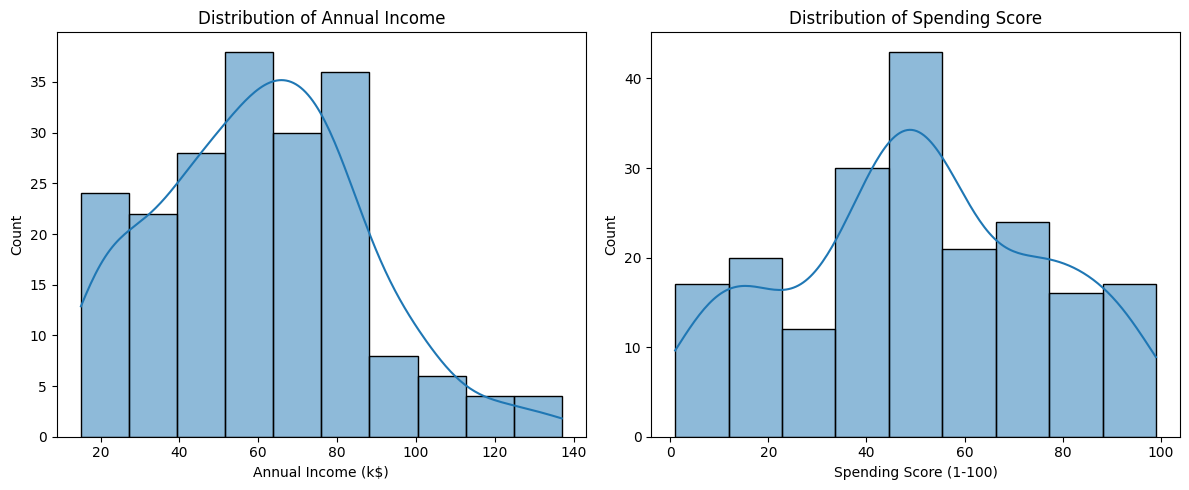

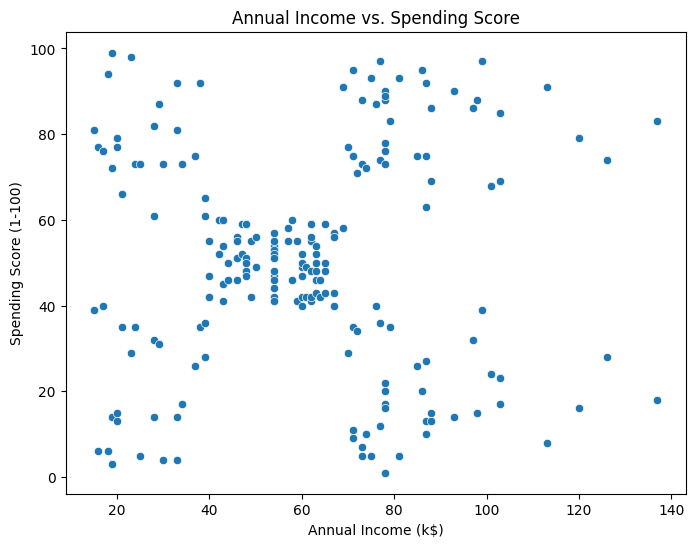

Initial Observations on Potential Clusters (from scatter plot):


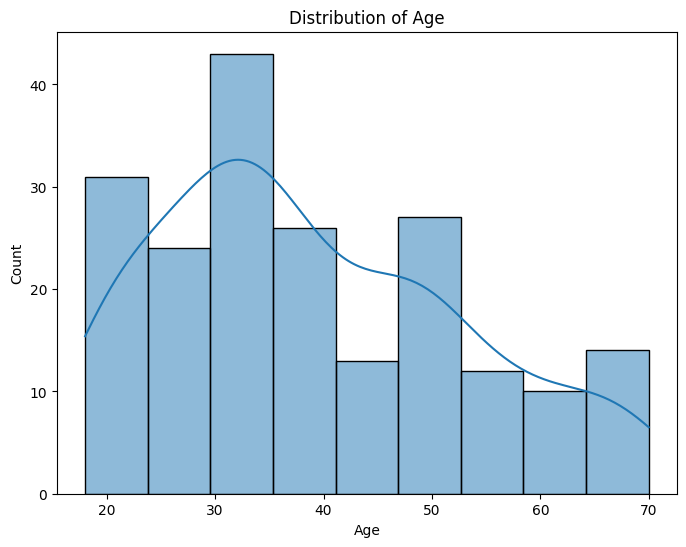

Initial Observations on Age Distribution:


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.dtypes)

print(df.isnull().sum())

print(df[['Annual Income (k$)', 'Spending Score (1-100)']].describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income')

plt.subplot(1, 2, 2)
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs. Spending Score')
plt.show()

print("Initial Observations on Potential Clusters (from scatter plot):")

plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

print("Initial Observations on Age Distribution:")

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

display(scaled_df.head())

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


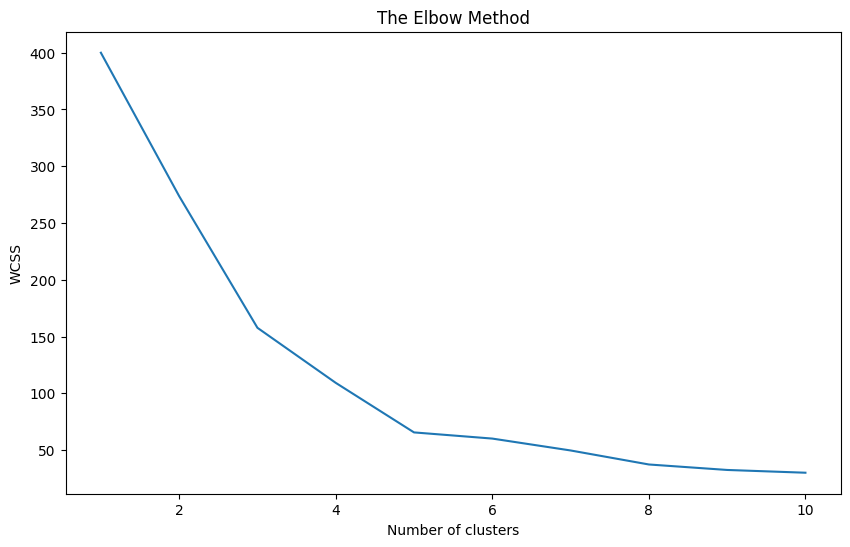

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

k_optimal = 5
kmeans_optimal = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
y_kmeans = kmeans_optimal.fit_predict(scaled_df)

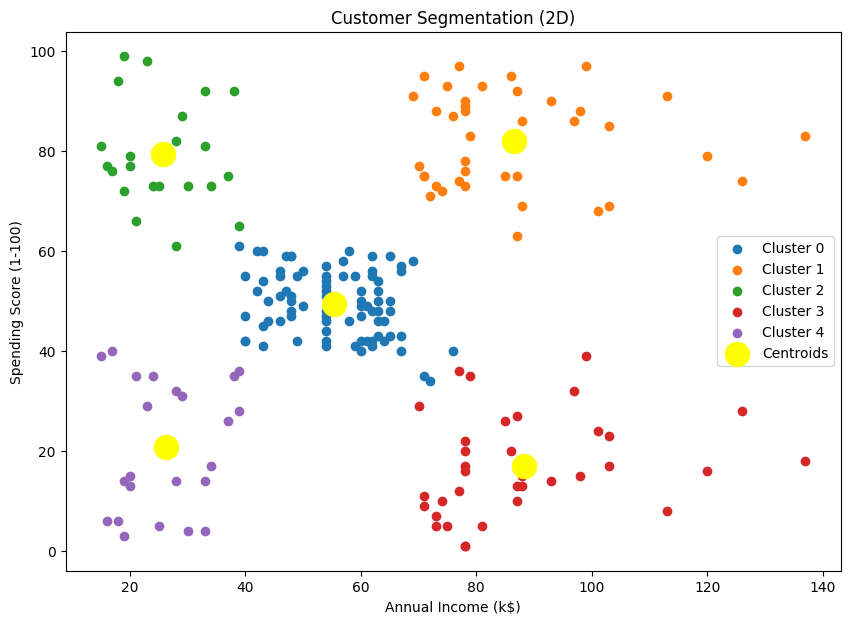

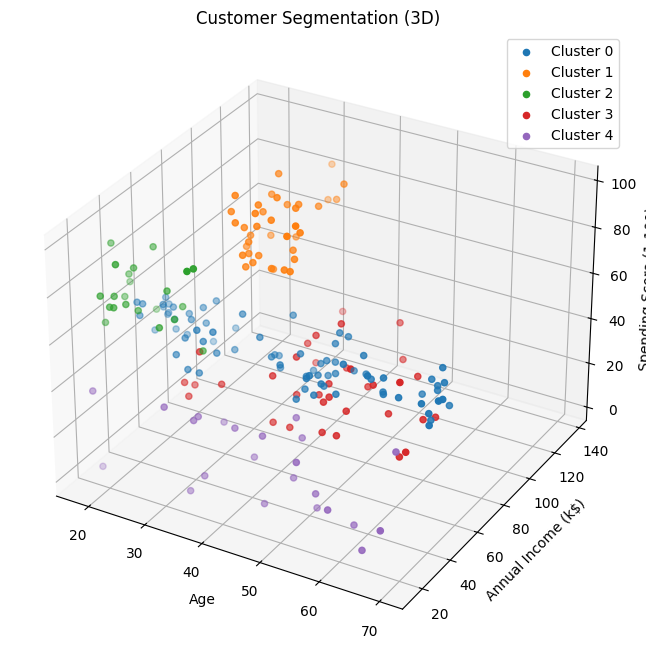

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(10, 7))
for i in range(k_optimal):
    plt.scatter(df[y_kmeans == i]['Annual Income (k$)'], df[y_kmeans == i]['Spending Score (1-100)'], label=f'Cluster {i}')
plt.scatter(scaler.inverse_transform(kmeans_optimal.cluster_centers_)[:,0], scaler.inverse_transform(kmeans_optimal.cluster_centers_)[:,1], s=300, c='yellow', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation (2D)')
plt.legend()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(k_optimal):
    ax.scatter(df[y_kmeans == i]['Age'], df[y_kmeans == i]['Annual Income (k$)'], df[y_kmeans == i]['Spending Score (1-100)'], label=f'Cluster {i}')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer Segmentation (3D)')
ax.legend()
plt.show()